In [39]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import numpy as np

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_squared_error
from scipy.spatial.distance import cdist
from numpy.linalg import pinv
from math import sqrt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import geopy.distance as distance
from sklearn.preprocessing import MinMaxScaler

import Data_utils
import matplotlib.ticker as ticker
from functools import reduce
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Import the data to plot
plot_data = pd.read_csv('Data/exp/1x.csv')
plot_data_y = pd.read_csv('Data/exp/1y.csv')

In [56]:
plot_data.iloc[:,0:20]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,52.07,-111.45,10.5,0.3,6.0,23.0,143.259219,52.42,-114.91,8.4,0.0,12.0,15.0,157.615329,53.55,-114.11,9.5,2.3,11.0
1,1,52.07,-111.45,10.5,0.0,5.0,28.0,143.259219,52.42,-114.91,7.8,0.2,10.0,8.0,157.615329,53.55,-114.11,8.5,1.7,10.0
2,2,52.07,-111.45,7.0,0.0,26.0,17.0,143.259219,52.42,-114.91,3.8,0.0,31.0,4.0,157.615329,53.55,-114.11,6.9,0.0,25.0
3,3,52.07,-111.45,21.6,0.0,15.0,20.0,143.259219,52.42,-114.91,15.1,0.0,31.0,16.0,157.615329,53.55,-114.11,20.9,0.0,17.0
4,4,52.07,-111.45,17.7,0.0,19.0,11.0,143.259219,52.42,-114.91,15.1,0.0,35.0,10.0,157.615329,53.55,-114.11,11.1,4.5,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507869,507869,53.58,-116.47,17.6,0.0,32.0,11.0,562.802954,56.65,-111.22,17.5,0.0,32.0,18.0,416.948132,55.29,-114.78,16.2,0.0,29.0
507870,507870,53.58,-116.47,18.4,0.0,27.0,11.0,562.802954,56.65,-111.22,18.6,0.2,31.0,13.0,416.948132,55.29,-114.78,16.7,0.0,30.0
507871,507871,53.58,-116.47,19.9,0.0,24.0,5.0,562.802954,56.65,-111.22,19.5,0.0,30.0,17.0,416.948132,55.29,-114.78,17.0,0.0,29.0
507872,507872,53.58,-116.47,19.6,0.0,1.0,5.0,562.802954,56.65,-111.22,19.5,0.0,31.0,22.0,416.948132,55.29,-114.78,16.6,0.0,30.0


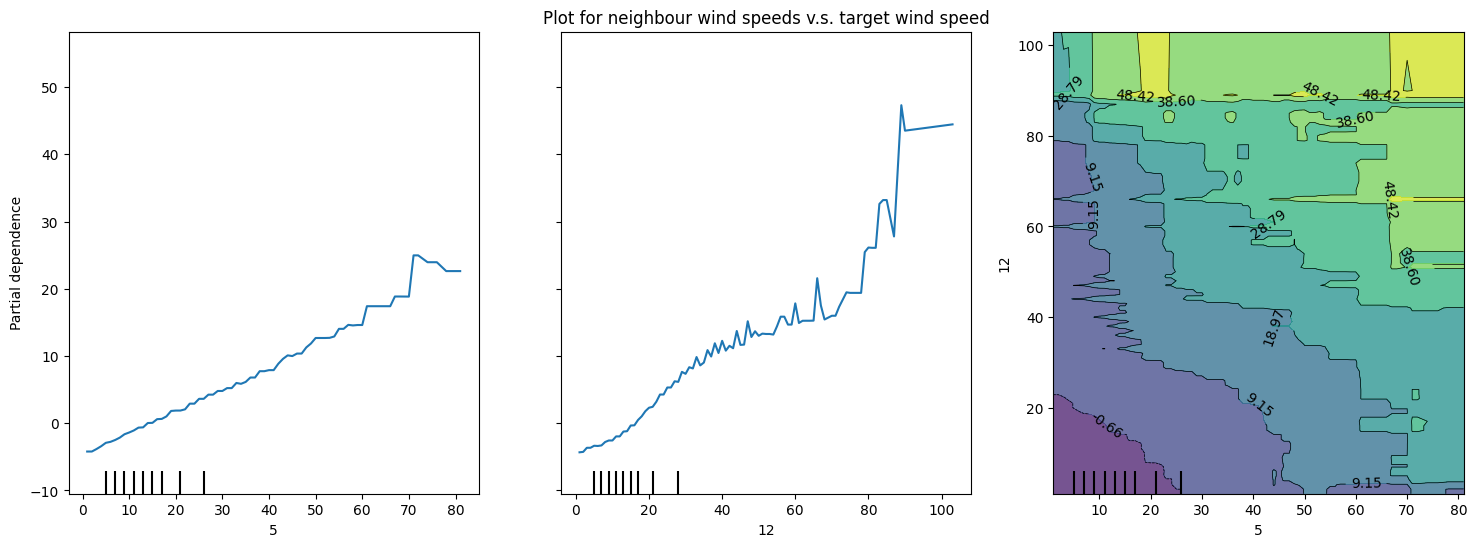

In [62]:
# Code for partial dependency plot
# Modified from source: https://scikit-learn.org/stable/modules/partial_dependence.html
# and source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Plot for neighbour wind speeds v.s. target wind speed")

# Select features to plot
x = plot_data.iloc[:, [6,13]]
y= plot_data_y.iloc[:,1]

reg = GradientBoostingRegressor(random_state=0).fit(x, y)
features=[0, 1, (0,1)]

PartialDependenceDisplay.from_estimator(reg, x, features, ax=ax)

In [50]:
def plot_partial_dependence_plot_for_data(x, y, tilte):
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.set_title(tilte)

    reg = GradientBoostingRegressor(random_state=0).fit(x, y)
    features=[0, 1, (0,1)]

    PartialDependenceDisplay.from_estimator(reg, x, features, ax=ax)

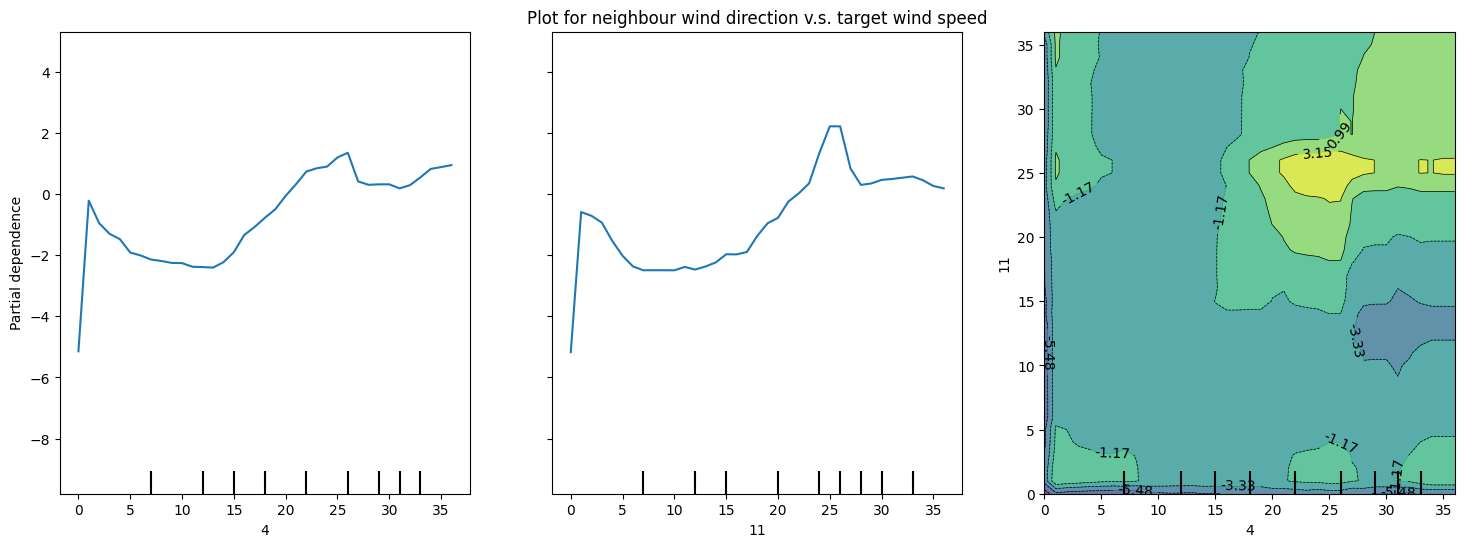

In [63]:
# Plot wind direction vs wnd speed
# Select features to plot
x = plot_data.iloc[:, [5,12]]
y= plot_data_y.iloc[:,1]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind speed")

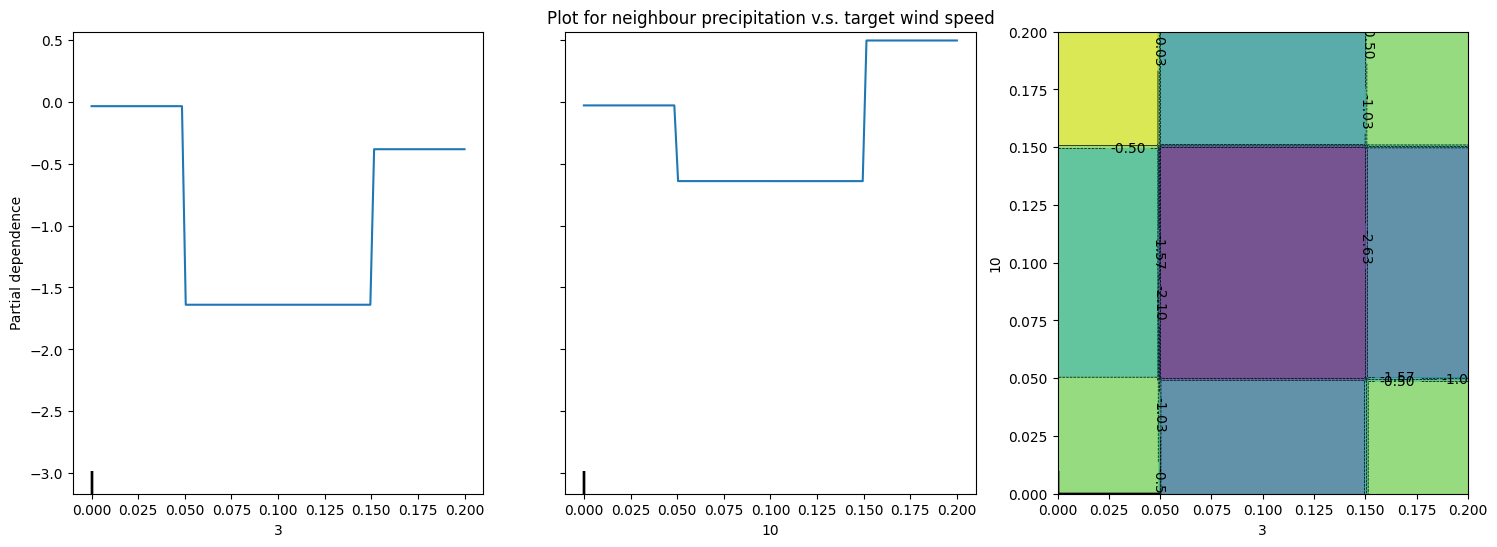

In [64]:
# Plot precp vs wnd speed
# Select features to plot
x = plot_data.iloc[:, [4,11]]
y= plot_data_y.iloc[:,1]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour precipitation v.s. target wind speed")

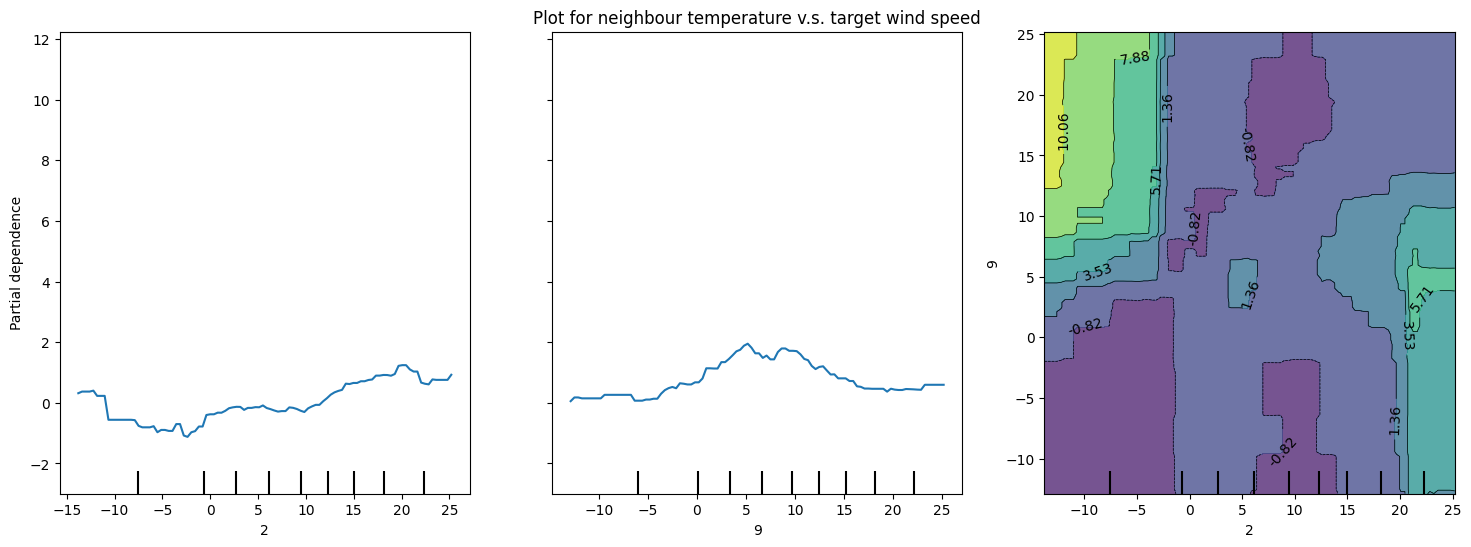

In [65]:
# Plot temp vs wnd speed
# Select features to plot
x = plot_data.iloc[:, [3,10]]
y= plot_data_y.iloc[:,1]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour temperature v.s. target wind speed")

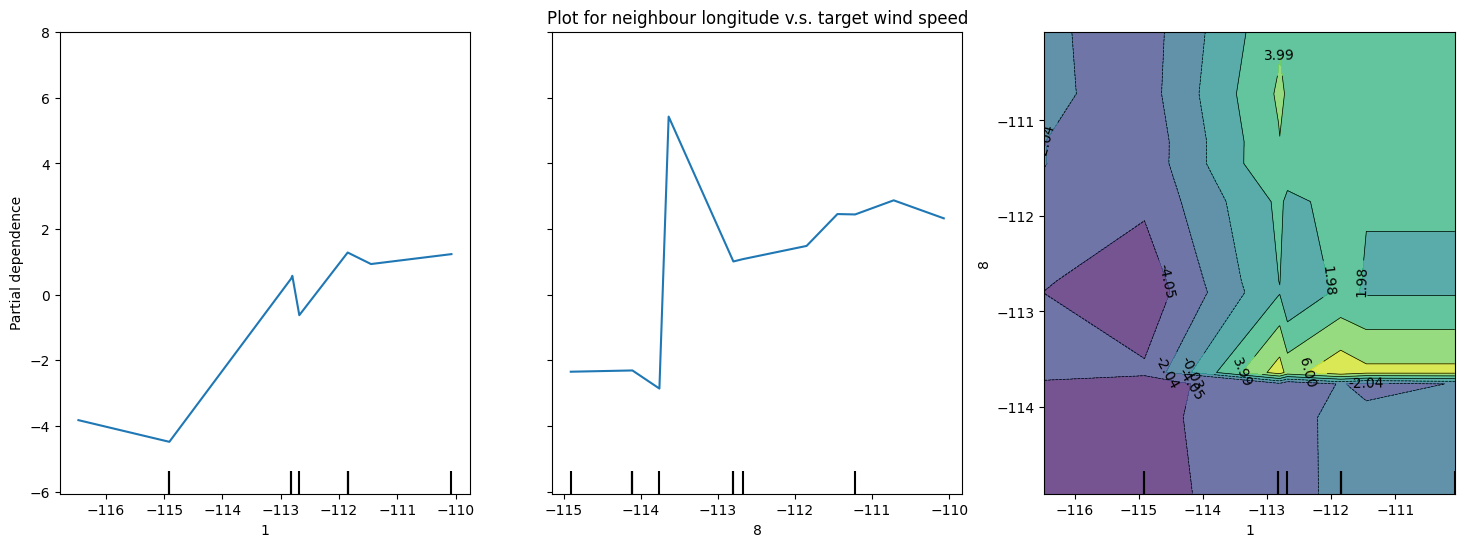

In [66]:
# Plot temp vs wnd speed
# Select features to plot
x = plot_data.iloc[:, [2,9]]
y= plot_data_y.iloc[:,1]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour longitude v.s. target wind speed")

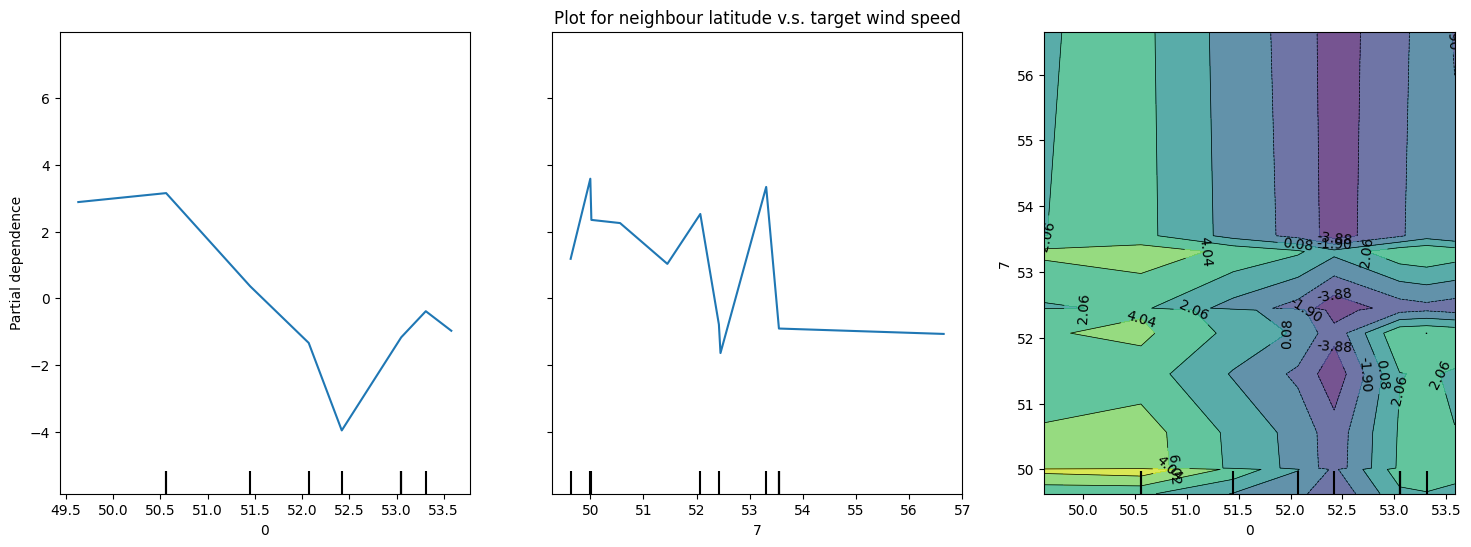

In [67]:
# Plot temp vs wnd speed
# Select features to plot
x = plot_data.iloc[:, [1,8]]
y= plot_data_y.iloc[:,1]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour latitude v.s. target wind speed")